<a href="https://colab.research.google.com/github/ambideXtrous9/Image-Classification-FASHION-MNIST/blob/main/FASHION_MNNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow_datasets as tfds
import tensorflow as tf
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2,InceptionV3,VGG16,MobileNetV3Large
from tensorflow.keras.layers import AveragePooling2D,Dropout,Convolution2D,MaxPooling2D
from tensorflow.keras.layers import Dropout,BatchNormalization,Conv2D
from tensorflow.keras.layers import Flatten,Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
import keras
from tensorflow.keras.datasets import fashion_mnist
import cv2
from google.colab.patches import cv2_imshow
import tarfile
import pandas as pd
from google.colab.patches import cv2_imshow
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn

In [20]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [21]:
x_test_temp = x_test
x_train_temp = x_train

In [22]:
x_train.shape

(60000, 28, 28)

In [23]:
label_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [24]:
len(label_names)

10

In [25]:
def showimg(x,y,i):
    plt.imshow(x[i])
    print(label_names[y[i]])

Pullover


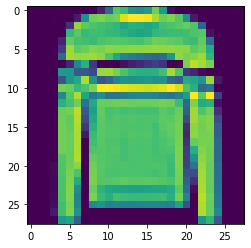

In [26]:
showimg(x_train,y_train,5)

Sandal


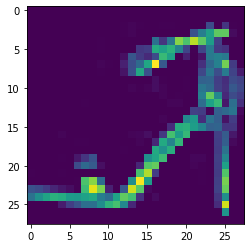

In [27]:
showimg(x_train_temp,y_train,8)

In [28]:
x_train = np.reshape(x_train, (-1, 28, 28, 1))
x_test = np.reshape(x_test, (-1, 28, 28, 1))

In [29]:
y_test.shape

(10000,)

In [30]:
y_test = y_test.reshape((10000,1))

In [31]:
y_train = y_train.reshape((60000,1))

In [32]:
y_train.shape

(60000, 1)

In [33]:
y_test.shape

(10000, 1)

In [34]:
IMG_SIZE = 28
INIT_LR = 1e-5
EPOCHS =  100
BS = 16
NUM_CLASSES = 10

In [35]:
from keras.utils import np_utils


In [36]:
# Convert class vectors to binary class matrices.
y_train = np_utils.to_categorical(y_train,NUM_CLASSES)
y_test = np_utils.to_categorical(y_test,NUM_CLASSES)

In [37]:
y_test.shape

(10000, 10)

In [38]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(NUM_CLASSES, activation='softmax'))
#sgd = SGD(lr=INIT_LR,momentum=0.9,nesterov=False)
model.compile(loss="categorical_crossentropy", optimizer='sgd',metrics=["accuracy"])

In [39]:
H = model.fit(x_train,y_train,
              validation_data = (x_test,y_test),
              epochs=EPOCHS)

Epoch 1/100
1875/1875 [==============================] - 40s 4ms/step - loss: 1.8312 - accuracy: 0.4349 - val_loss: 1.2457 - val_accuracy: 0.5525
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0844 - accuracy: 0.5882 - val_loss: 0.7979 - val_accuracy: 0.7161
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7748 - accuracy: 0.7165 - val_loss: 0.6091 - val_accuracy: 0.7698
Epoch 4/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6564 - accuracy: 0.7565 - val_loss: 0.5411 - val_accuracy: 0.8006
Epoch 5/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5746 - accuracy: 0.7858 - val_loss: 0.4641 - val_accuracy: 0.8326
Epoch 6/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5160 - accuracy: 0.8079 - val_loss: 0.4215 - val_accuracy: 0.8438
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4699 - accuracy: 0.8255 - val_loss: 0.3815 - val_a

In [40]:
model.save('FASHION-MNNIST-SGD.model', save_format="h5")

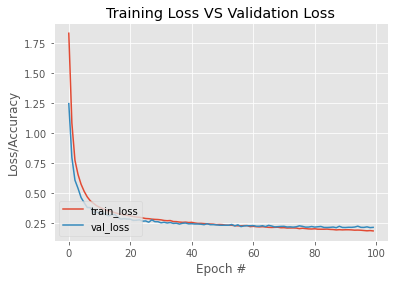

<Figure size 432x288 with 0 Axes>

In [41]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Training Loss VS Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()
plt.savefig('graph.png')

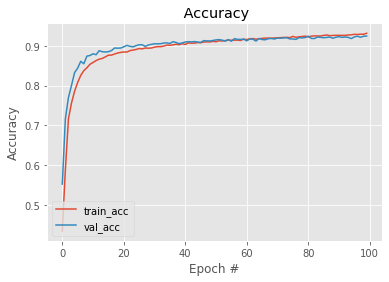

In [42]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title(" Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.show()

In [43]:
def predimageTest(path,y):
    plt.imshow(path)
    test = img_to_array(path)
    #test = test.reshape((-1,))
    test = np.expand_dims(test,axis=0) 
    result = model.predict(test,batch_size = BS)
    y_class = result.argmax(axis=1)
    result = (result*100)
    result = list(np.around(np.array(result),1))
    i = y_class[0]
    s = result[0][i]
    plt.text(0, 40,y[i],size=30,color='red')
    plt.text(20, 40,s,size=25,color='green')
    print(result)
    print(y[i])

[array([  0., 100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
      dtype=float32)]
Trouser


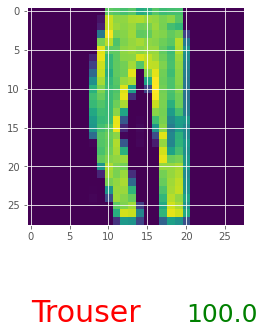

In [44]:
predimageTest(x_test_temp[5],label_names)


[array([ 8.1,  0. ,  0. ,  0. ,  0. ,  0. , 91.9,  0. ,  0. ,  0. ],
      dtype=float32)]
Shirt


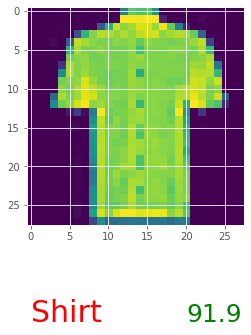

In [45]:
predimageTest(x_test_temp[40],label_names)


In [46]:
def predimage(link,y):
    from PIL import Image,ImageDraw
    image = Image.open(link)
    test = cv2.imread(link,cv2.IMREAD_GRAYSCALE)
    test = cv2.resize(test, (28, 28))
    test = 255 - test
    test = img_to_array(test)
    test = np.expand_dims(test,axis=0)
    #test /= 255 
    result = model.predict(test,batch_size = BS)
    y_class = result.argmax(axis=1)
    result = (result*100)
    result = list(np.around(np.array(result),1))
    i = y_class[0]
    s = result[0][i]
    plt.text(1, 1,y[i],size=30,color='red', horizontalalignment='left',verticalalignment='top')
    plt.text(0.5, 0.5,s,size=25,color='green',horizontalalignment='right',verticalalignment='bottom')
    plt.imshow(image)
    print(result)
    print(y[i])

In [47]:
label_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

[array([ 1.2,  1. ,  0.6,  3.1,  0. , 13.9,  1.2, 50.3,  9.1, 19.7],
      dtype=float32)]
Sneaker


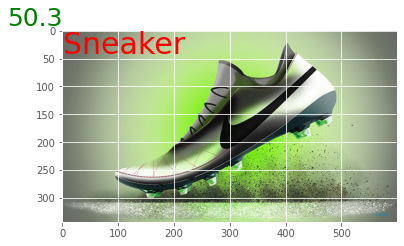

In [54]:
predimage('/content/nike.jpg',label_names)

[array([ 0.3,  0. , 16.2,  0.1,  4.6,  0. , 78.7,  0. ,  0.2,  0. ],
      dtype=float32)]
Shirt


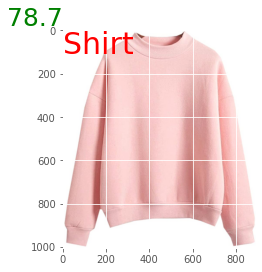

In [56]:
predimage('/content/plv.jpg',label_names)

Confusion Matrix on Test Set


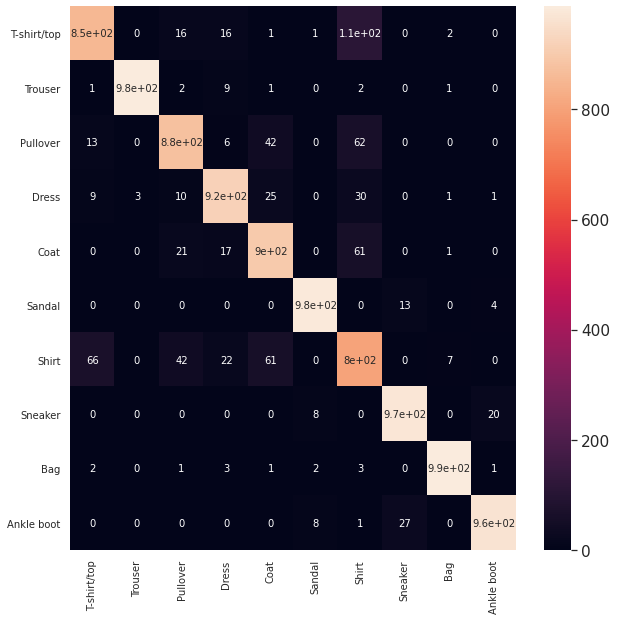

In [57]:
print('Confusion Matrix on Test Set')
pred = model.predict(x=x_test)
pred = np.argmax(pred, axis=1)
temp = np.argmax(y_test,axis=1)
cm = confusion_matrix(temp, pred)
df_cm = pd.DataFrame(cm, range(NUM_CLASSES), range(NUM_CLASSES))
plt.figure(figsize=(10,10))
sn.set(font_scale=1.4) # for label size
ax = sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size
ax.set_xticklabels(label_names, rotation='vertical', fontsize=10)
ax.set_yticklabels(label_names, rotation='horizontal', fontsize=10)
plt.show()